<a href="https://colab.research.google.com/github/Julian27R/Trabajos/blob/main/Codigo_09052025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Create a Python class called SignalGenerator that generates signals with multiple harmonics and Gaussian noise. The class must include: 1) A constructor that receives sampling frequency and number of samples, 2) A generate_signal method that takes amplitudes/frequencies of 3 harmonics and noise variance, returning arrays of time, clean signal and signal with noise, 3) A plot_signal method to visualize both signals. Then implement a main function that uses this class with configurable parameters (sample rate=1000Hz, 2000 samples, amplitudes [1,0,0], frequencies [10,30,60]Hz, no noise) and display the results. Use numpy for calculations and matplotlib for graphics, with clean code style and proper documentation.

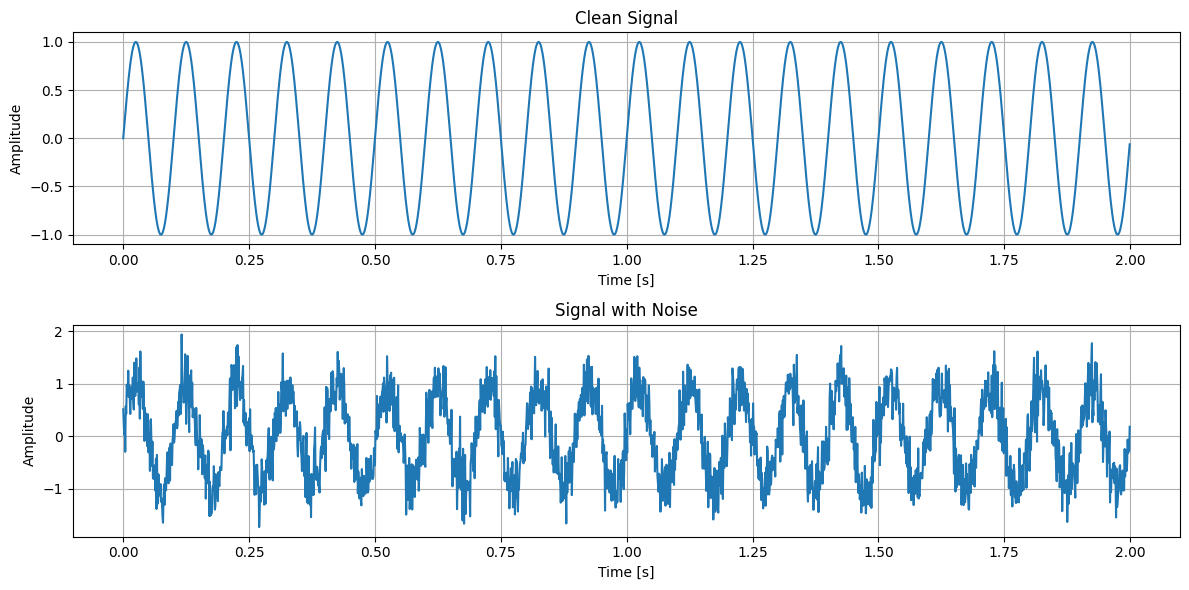

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class SignalGenerator:
    """
    A class to generate signals with multiple harmonics and Gaussian noise.

    Attributes:
        fs (float): Sampling frequency in Hz
        num_samples (int): Number of samples to generate
        time (np.ndarray): Time array for the signal
    """

    def __init__(self, sampling_frequency: float, num_samples: int):
        """
        Initialize the SignalGenerator with sampling parameters.

        Args:
            sampling_frequency: The sampling frequency in Hz
            num_samples: The number of samples to generate
        """
        self.fs = sampling_frequency
        self.num_samples = num_samples
        self.time = np.arange(num_samples) / sampling_frequency

    def generate_signal(self, amplitudes: list, frequencies: list, noise_variance: float = 0.0) -> tuple:
        """
        Generate a signal with harmonics and optional Gaussian noise.

        Args:
            amplitudes: List of amplitudes for each harmonic (up to 3)
            frequencies: List of frequencies for each harmonic in Hz (up to 3)
            noise_variance: Variance of the Gaussian noise to add

        Returns:
            tuple: (time_array, clean_signal, noisy_signal)
        """
        if len(amplitudes) != 3 or len(frequencies) != 3:
            raise ValueError("Amplitudes and frequencies must have exactly 3 elements")

        clean_signal = np.zeros_like(self.time)

        # Generate each harmonic component
        for amp, freq in zip(amplitudes, frequencies):
            if amp != 0 and freq != 0:  # Skip if amplitude or frequency is zero
                clean_signal += amp * np.sin(2 * np.pi * freq * self.time)

        # Add Gaussian noise
        noise = np.random.normal(0, np.sqrt(noise_variance), self.num_samples)
        noisy_signal = clean_signal + noise

        return self.time, clean_signal, noisy_signal

    def plot_signal(self, time: np.ndarray, clean_signal: np.ndarray, noisy_signal: np.ndarray):
        """
        Plot both clean and noisy signals.

        Args:
            time: Time array for the x-axis
            clean_signal: Clean signal values
            noisy_signal: Noisy signal values
        """
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 1, 1)
        plt.plot(time, clean_signal)
        plt.title('Clean Signal')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.plot(time, noisy_signal)
        plt.title('Signal with Noise')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.grid(True)

        plt.tight_layout()
        plt.show()


def main():
    """
    Main function to demonstrate the SignalGenerator class.
    """
    # Configuration parameters
    sampling_frequency = 1000  # Hz
    num_samples = 2000
    amplitudes = [1, 0, 0]  # Only first harmonic
    frequencies = [10, 30, 60]  # Hz
    noise_variance = 0.1  # No noise

    # Create signal generator and generate signal
    generator = SignalGenerator(sampling_frequency, num_samples)
    time, clean_signal, noisy_signal = generator.generate_signal(
        amplitudes, frequencies, noise_variance
    )

    # Plot the results
    generator.plot_signal(time, clean_signal, noisy_signal)


if __name__ == "__main__":
    main()

Continue with the previous code without modifications and give all code (previous + next), generate in a function the histogram signal (use only positive values) and in the same histogram overlay the KDE of the signal and in an other function estimate the PSD of the signal using Welch method (nperseg modifiable parameter in main) and plot the PSD where y axis must be in dB (10log()) and x axis in semilogx.

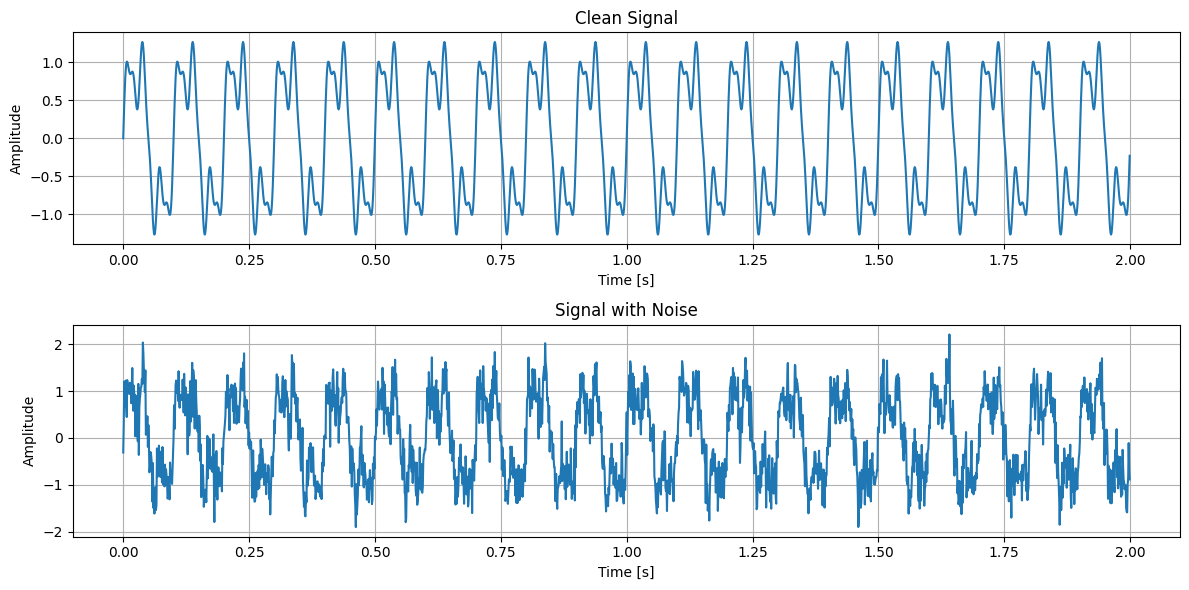

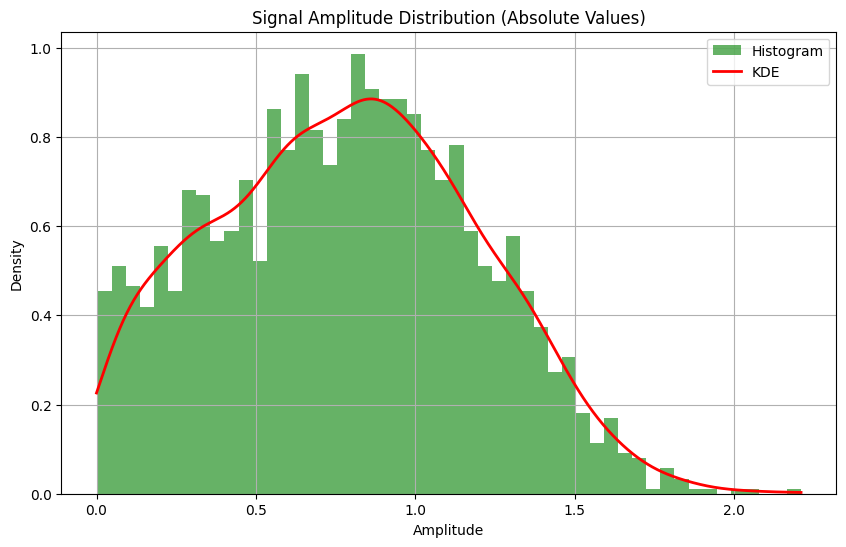

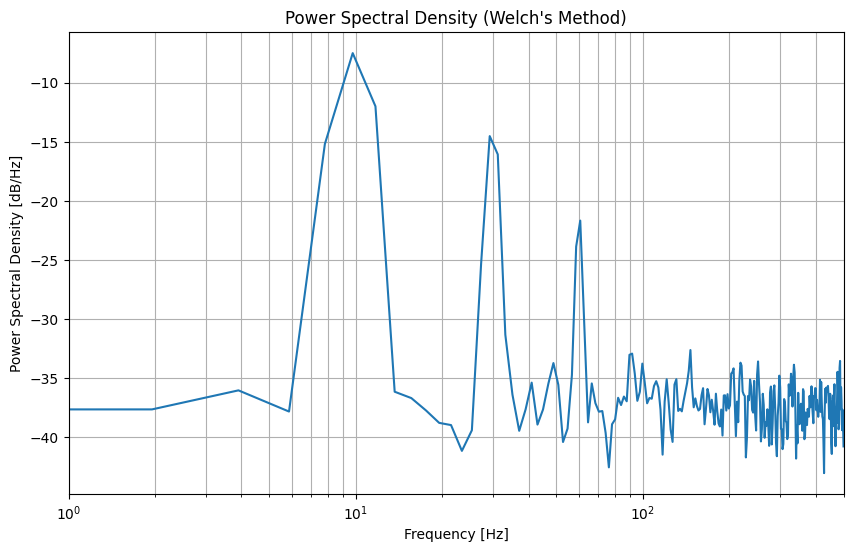

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import gaussian_kde


class SignalGenerator:
    """
    A class to generate signals with multiple harmonics and Gaussian noise.

    Attributes:
        fs (float): Sampling frequency in Hz
        num_samples (int): Number of samples to generate
        time (np.ndarray): Time array for the signal
    """

    def __init__(self, sampling_frequency: float, num_samples: int):
        """
        Initialize the SignalGenerator with sampling parameters.

        Args:
            sampling_frequency: The sampling frequency in Hz
            num_samples: The number of samples to generate
        """
        self.fs = sampling_frequency
        self.num_samples = num_samples
        self.time = np.arange(num_samples) / sampling_frequency

    def generate_signal(self, amplitudes: list, frequencies: list, noise_variance: float = 0.0) -> tuple:
        """
        Generate a signal with harmonics and optional Gaussian noise.

        Args:
            amplitudes: List of amplitudes for each harmonic (up to 3)
            frequencies: List of frequencies for each harmonic in Hz (up to 3)
            noise_variance: Variance of the Gaussian noise to add

        Returns:
            tuple: (time_array, clean_signal, noisy_signal)
        """
        if len(amplitudes) != 3 or len(frequencies) != 3:
            raise ValueError("Amplitudes and frequencies must have exactly 3 elements")

        clean_signal = np.zeros_like(self.time)

        # Generate each harmonic component
        for amp, freq in zip(amplitudes, frequencies):
            if amp != 0 and freq != 0:  # Skip if amplitude or frequency is zero
                clean_signal += amp * np.sin(2 * np.pi * freq * self.time)

        # Add Gaussian noise
        noise = np.random.normal(0, np.sqrt(noise_variance), self.num_samples)
        noisy_signal = clean_signal + noise

        return self.time, clean_signal, noisy_signal

    def plot_signal(self, time: np.ndarray, clean_signal: np.ndarray, noisy_signal: np.ndarray):
        """
        Plot both clean and noisy signals.

        Args:
            time: Time array for the x-axis
            clean_signal: Clean signal values
            noisy_signal: Noisy signal values
        """
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 1, 1)
        plt.plot(time, clean_signal)
        plt.title('Clean Signal')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.plot(time, noisy_signal)
        plt.title('Signal with Noise')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def plot_histogram_with_kde(self, signal_data: np.ndarray, bins: int = 50):
        """
        Plot histogram of signal values (absolute values) with KDE overlay.

        Args:
            signal_data: Input signal data
            bins: Number of bins for the histogram
        """
        # Take absolute values of the signal
        abs_signal = np.abs(signal_data)

        plt.figure(figsize=(10, 6))

        # Plot histogram
        plt.hist(abs_signal, bins=bins, density=True, alpha=0.6, color='g', label='Histogram')

        # Calculate and plot KDE
        kde = gaussian_kde(abs_signal)
        x_vals = np.linspace(0, np.max(abs_signal), 1000)
        plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')

        plt.title('Signal Amplitude Distribution (Absolute Values)')
        plt.xlabel('Amplitude')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_psd(self, signal_data: np.ndarray, nperseg: int = 256):
        """
        Estimate and plot Power Spectral Density using Welch's method.

        Args:
            signal_data: Input signal data
            nperseg: Length of each segment for Welch's method
        """
        # Compute PSD using Welch's method
        freqs, psd = signal.welch(signal_data, fs=self.fs, nperseg=nperseg)

        plt.figure(figsize=(10, 6))
        plt.semilogx(freqs, 10 * np.log10(psd))
        plt.title('Power Spectral Density (Welch\'s Method)')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Power Spectral Density [dB/Hz]')
        plt.grid(True, which="both", ls="-")
        plt.xlim([1, self.fs/2])  # Limit to Nyquist frequency
        plt.show()


def main():
    """
    Main function to demonstrate the SignalGenerator class.
    """
    # Configuration parameters
    sampling_frequency = 1000  # Hz
    num_samples = 2000
    amplitudes = [1, 0.5, 0.2]  # Three harmonics with different amplitudes
    frequencies = [10, 30, 60]  # Hz
    noise_variance = 0.1  # Add some noise
    nperseg = 512  # Segment length for Welch's method

    # Create signal generator and generate signal
    generator = SignalGenerator(sampling_frequency, num_samples)
    time, clean_signal, noisy_signal = generator.generate_signal(
        amplitudes, frequencies, noise_variance
    )

    # Plot the time domain signals
    generator.plot_signal(time, clean_signal, noisy_signal)

    # Plot histogram with KDE of the noisy signal (absolute values)
    generator.plot_histogram_with_kde(noisy_signal)

    # Plot PSD of the noisy signal
    generator.plot_psd(noisy_signal, nperseg=nperseg)


if __name__ == "__main__":
    main()

Continue with the previous code without modifications and give all code (previous + next), now I need you to generate 100 realizations and find the maximum value, i.e. I need you to calculate the peak value of the signal with noise 100 times, add the KDE and overlay in the histogram, add the following graphs in a subplot: 2 rows and 2 columns (signal with harmonics and noise, Histogram of noisy signal with KDE, PSD welch method, distribution of peak values (100 realizations)), also print the next peak value stadistics (mean,meedian, variance) and realize kolmogrov smirnov gaussivity test. Make sure all methods explicitly receive amplitudes, frequencies, and noise_variance as parameters to prevent NameError

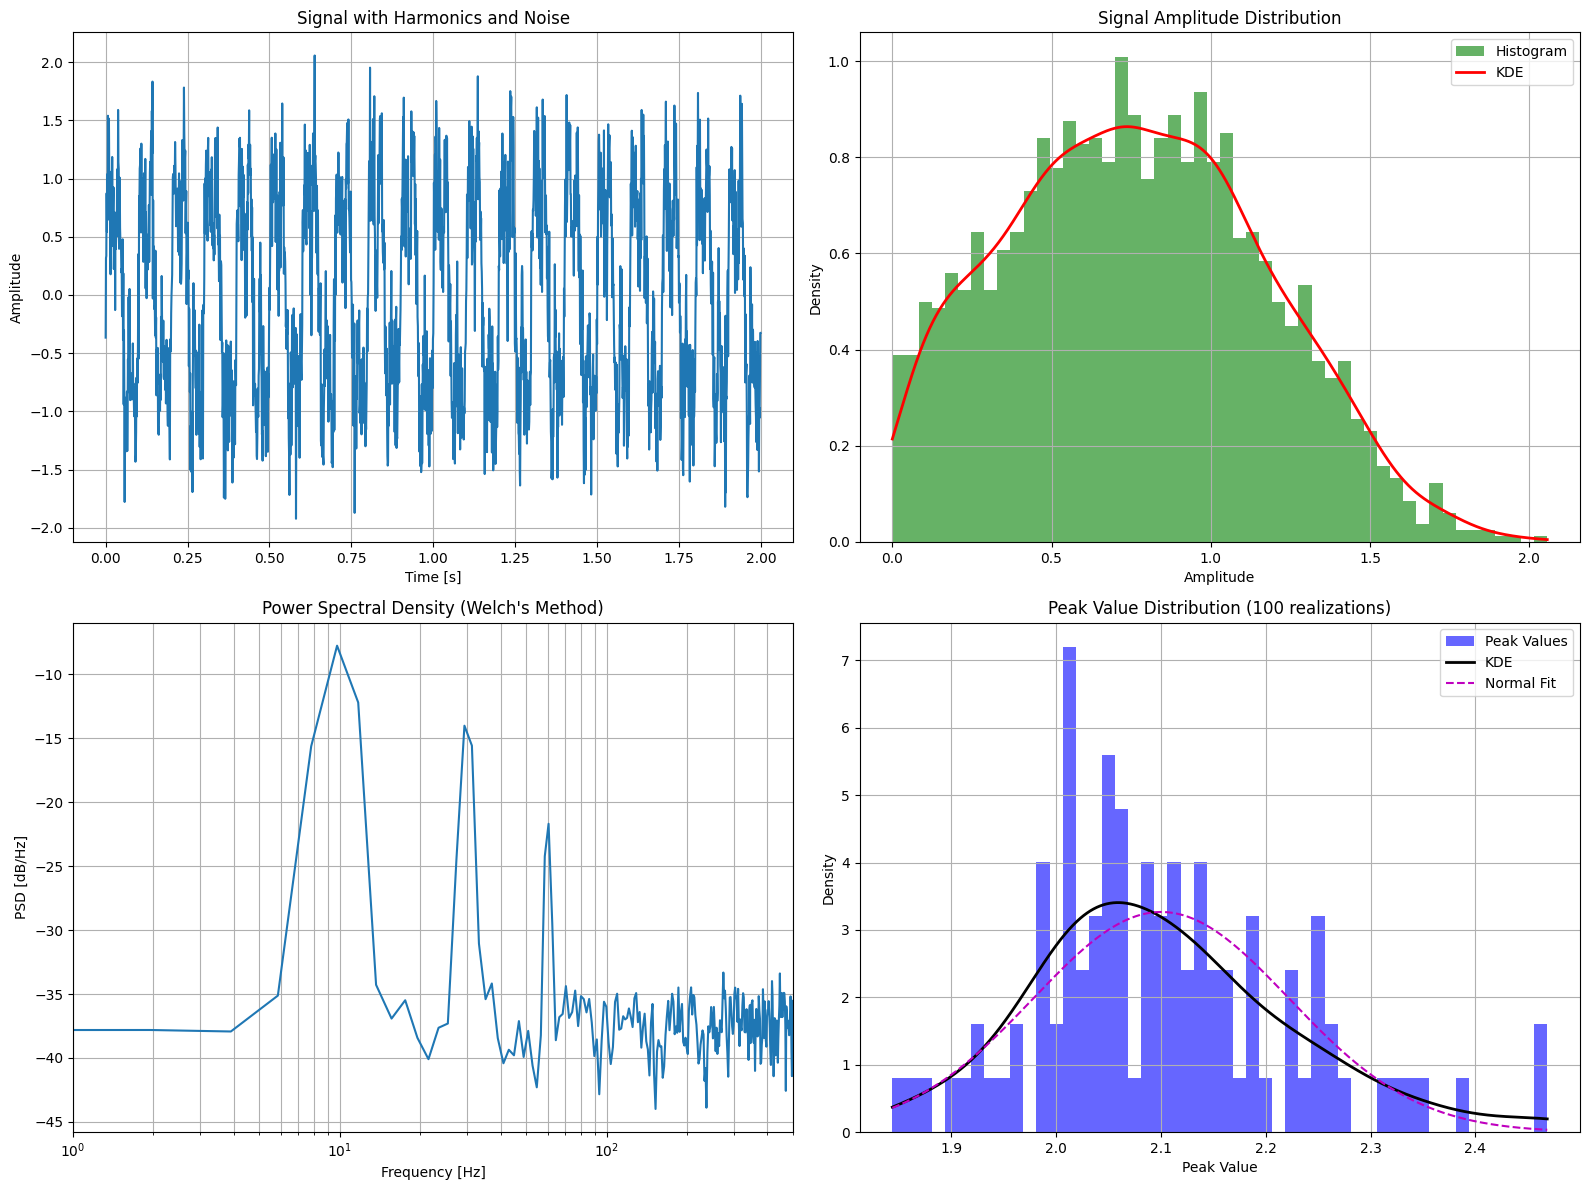


Peak Value Statistics:
Mean: 2.1002
Median: 2.0903
Variance: 0.0149
Min: 1.8437
Max: 2.4685

Kolmogorov-Smirnov Test for Normality:
KS Statistic: 0.0832
P-value: 0.4684
Result: Distribution is normal (fail to reject H0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import gaussian_kde, kstest, norm
import warnings
warnings.filterwarnings("ignore")  # Suppress KDE bandwidth warnings

class SignalGenerator:
    """
    A class to generate signals with multiple harmonics and Gaussian noise.

    Attributes:
        fs (float): Sampling frequency in Hz
        num_samples (int): Number of samples to generate
        time (np.ndarray): Time array for the signal
    """

    def __init__(self, sampling_frequency: float, num_samples: int):
        """
        Initialize the SignalGenerator with sampling parameters.

        Args:
            sampling_frequency: The sampling frequency in Hz
            num_samples: The number of samples to generate
        """
        self.fs = sampling_frequency
        self.num_samples = num_samples
        self.time = np.arange(num_samples) / sampling_frequency

    def generate_signal(self, amplitudes: list, frequencies: list, noise_variance: float = 0.0) -> tuple:
        """
        Generate a signal with harmonics and optional Gaussian noise.

        Args:
            amplitudes: List of amplitudes for each harmonic (up to 3)
            frequencies: List of frequencies for each harmonic in Hz (up to 3)
            noise_variance: Variance of the Gaussian noise to add

        Returns:
            tuple: (time_array, clean_signal, noisy_signal)
        """
        if len(amplitudes) != 3 or len(frequencies) != 3:
            raise ValueError("Amplitudes and frequencies must have exactly 3 elements")

        clean_signal = np.zeros_like(self.time)

        # Generate each harmonic component
        for amp, freq in zip(amplitudes, frequencies):
            if amp != 0 and freq != 0:  # Skip if amplitude or frequency is zero
                clean_signal += amp * np.sin(2 * np.pi * freq * self.time)

        # Add Gaussian noise
        noise = np.random.normal(0, np.sqrt(noise_variance), self.num_samples)
        noisy_signal = clean_signal + noise

        return self.time, clean_signal, noisy_signal

    def plot_combined_results(self, amplitudes: list, frequencies: list, noise_variance: float,
                            nperseg: int = 256, num_realizations: int = 100, bins: int = 50):
        """
        Plot all results in a 2x2 subplot and print statistics.

        Args:
            amplitudes: List of harmonic amplitudes
            frequencies: List of harmonic frequencies
            noise_variance: Noise variance
            nperseg: Segment length for Welch's method
            num_realizations: Number of realizations for peak statistics
            bins: Number of bins for histograms
        """
        plt.figure(figsize=(16, 12))

        # Generate one realization for time domain and PSD plots
        time, clean_signal, noisy_signal = self.generate_signal(amplitudes, frequencies, noise_variance)

        # 1. Time domain signal (top-left)
        plt.subplot(2, 2, 1)
        plt.plot(time, noisy_signal)
        plt.title('Signal with Harmonics and Noise')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.grid(True)

        # 2. Histogram with KDE (top-right)
        plt.subplot(2, 2, 2)
        abs_signal = np.abs(noisy_signal)
        plt.hist(abs_signal, bins=bins, density=True, alpha=0.6, color='g', label='Histogram')
        kde = gaussian_kde(abs_signal)
        x_vals = np.linspace(0, np.max(abs_signal), 1000)
        plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')
        plt.title('Signal Amplitude Distribution')
        plt.xlabel('Amplitude')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)

        # 3. PSD (bottom-left)
        plt.subplot(2, 2, 3)
        freqs, psd = signal.welch(noisy_signal, fs=self.fs, nperseg=nperseg)
        plt.semilogx(freqs, 10 * np.log10(psd))
        plt.title('Power Spectral Density (Welch\'s Method)')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('PSD [dB/Hz]')
        plt.grid(True, which="both", ls="-")
        plt.xlim([1, self.fs/2])

        # 4. Peak value distribution (bottom-right)
        plt.subplot(2, 2, 4)
        peak_values = self._generate_peak_distribution(amplitudes, frequencies, noise_variance, num_realizations)
        plt.hist(peak_values, bins=bins, density=True, alpha=0.6, color='b', label='Peak Values')

        # Add KDE for peak values
        kde_peaks = gaussian_kde(peak_values)
        x_vals = np.linspace(np.min(peak_values), np.max(peak_values), 1000)
        plt.plot(x_vals, kde_peaks(x_vals), 'k-', linewidth=2, label='KDE')

        # Add theoretical normal distribution if KS test passes
        ks_stat, p_value = kstest(peak_values, 'norm',
                                 args=(np.mean(peak_values), np.std(peak_values)))
        if p_value > 0.05:
            normal_pdf = norm.pdf(x_vals, np.mean(peak_values), np.std(peak_values))
            plt.plot(x_vals, normal_pdf, 'm--', label='Normal Fit')

        plt.title(f'Peak Value Distribution ({num_realizations} realizations)')
        plt.xlabel('Peak Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print statistics
        self._print_peak_statistics(peak_values)

    def _generate_peak_distribution(self, amplitudes: list, frequencies: list,
                                  noise_variance: float, num_realizations: int) -> np.ndarray:
        """
        Generate distribution of peak values from multiple realizations.

        Args:
            amplitudes: List of harmonic amplitudes
            frequencies: List of harmonic frequencies
            noise_variance: Noise variance
            num_realizations: Number of realizations

        Returns:
            np.ndarray: Array of peak values
        """
        peak_values = np.zeros(num_realizations)
        for i in range(num_realizations):
            _, _, noisy_signal = self.generate_signal(amplitudes, frequencies, noise_variance)
            peak_values[i] = np.max(np.abs(noisy_signal))
        return peak_values

    def _print_peak_statistics(self, peak_values: np.ndarray):
        """
        Print statistics of peak values and KS test results.

        Args:
            peak_values: Array of peak values
        """
        print("\nPeak Value Statistics:")
        print(f"Mean: {np.mean(peak_values):.4f}")
        print(f"Median: {np.median(peak_values):.4f}")
        print(f"Variance: {np.var(peak_values):.4f}")
        print(f"Min: {np.min(peak_values):.4f}")
        print(f"Max: {np.max(peak_values):.4f}")

        # Kolmogorov-Smirnov test for normality
        ks_stat, p_value = kstest(peak_values, 'norm',
                                 args=(np.mean(peak_values), np.std(peak_values)))
        print("\nKolmogorov-Smirnov Test for Normality:")
        print(f"KS Statistic: {ks_stat:.4f}")
        print(f"P-value: {p_value:.4f}")
        if p_value > 0.05:
            print("Result: Distribution is normal (fail to reject H0)")
        else:
            print("Result: Distribution is NOT normal (reject H0)")


def main():
    """
    Main function to demonstrate the SignalGenerator class.
    """
    # Configuration parameters
    sampling_frequency = 1000  # Hz
    num_samples = 2000
    amplitudes = [1, 0.5, 0.2]  # Three harmonics with different amplitudes
    frequencies = [10, 30, 60]  # Hz
    noise_variance = 0.1  # Noise variance
    nperseg = 512  # Segment length for Welch's method
    num_realizations = 100  # Number of realizations for peak statistics

    # Create signal generator
    generator = SignalGenerator(sampling_frequency, num_samples)

    # Generate and plot all results
    generator.plot_combined_results(
        amplitudes=amplitudes,
        frequencies=frequencies,
        noise_variance=noise_variance,
        nperseg=nperseg,
        num_realizations=num_realizations
    )


if __name__ == "__main__":
    main()

Continue with the previous code without modifications and give all the code (previous + next), add in a function that calculates the signal to noise ratio (SNR) and plot it for noise power (it is the same as noise variance) for values of 0.1, 0.2, 0.4, 0.8 and 1.6. and print noise power and SNR values

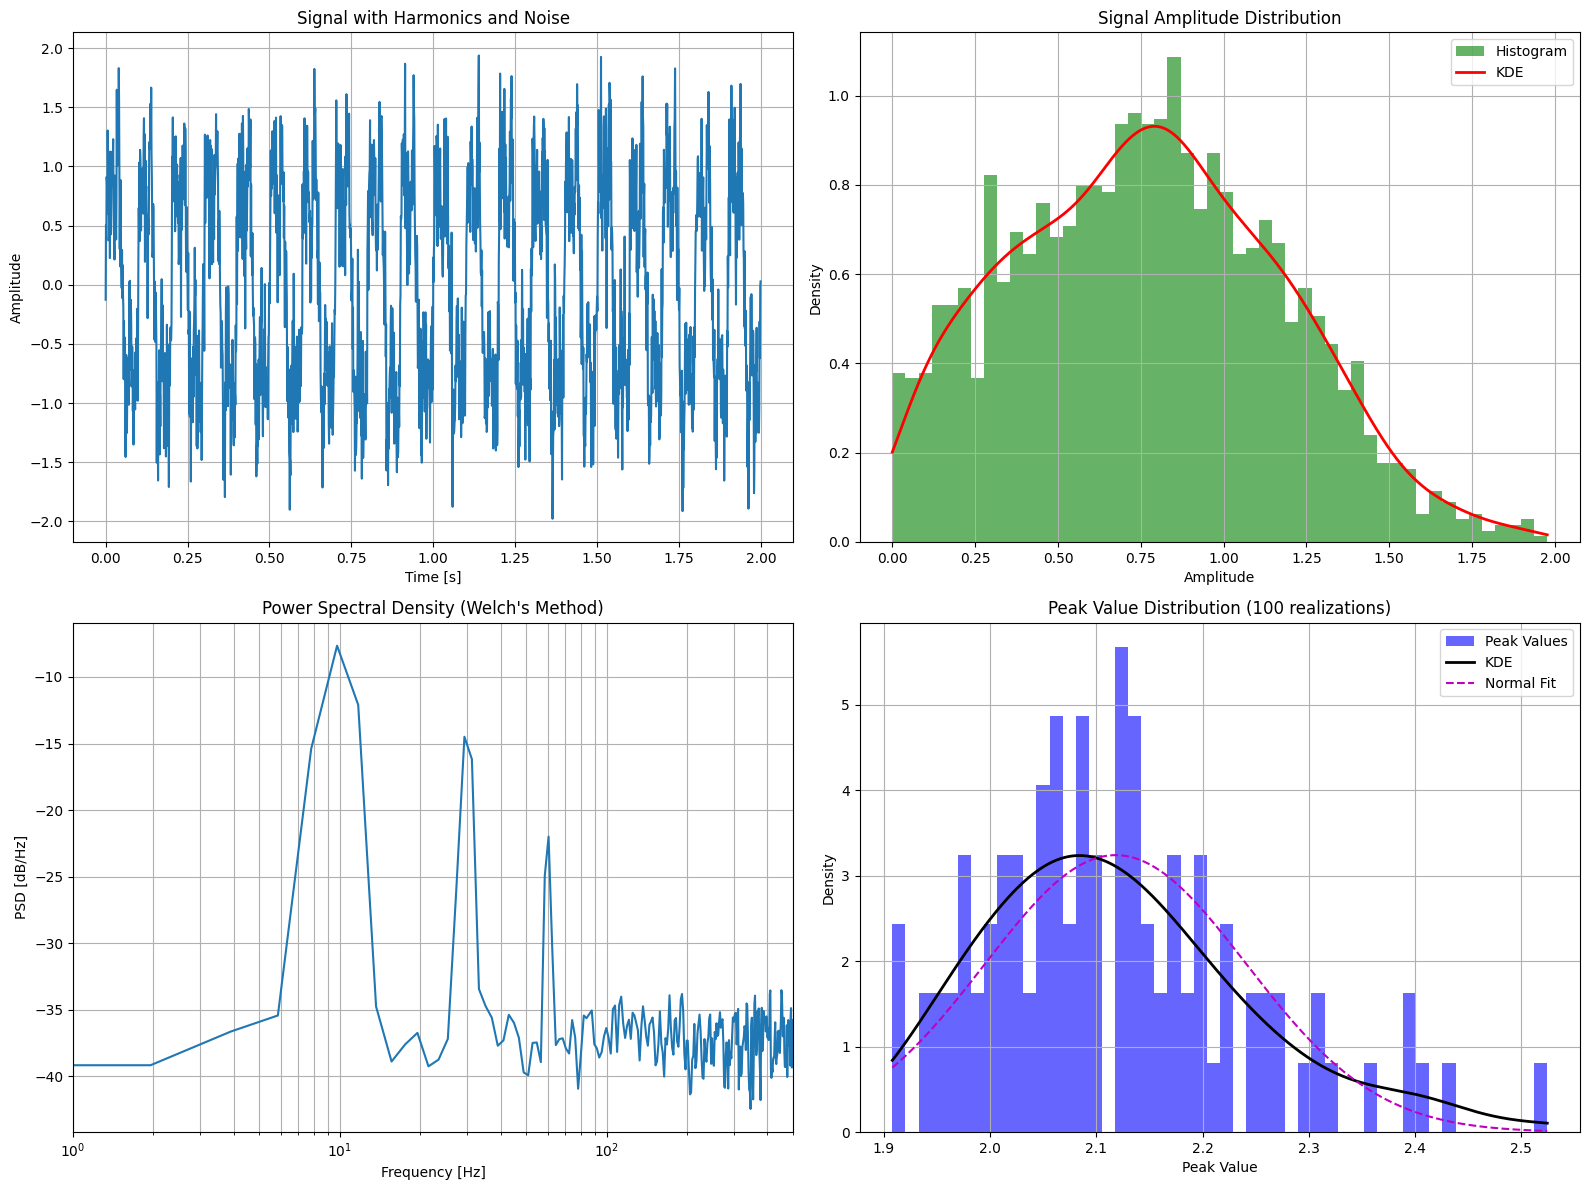


Peak Value Statistics:
Mean: 2.1181
Median: 2.0973
Variance: 0.0152
Min: 1.9079
Max: 2.5244

Kolmogorov-Smirnov Test for Normality:
KS Statistic: 0.0779
P-value: 0.5519
Result: Distribution is normal (fail to reject H0)
Noise Power vs SNR Results:
Noise Power  SNR (dB)    
------------------------
0.1000       8.3382      
0.2000       5.4264      
0.4000       2.0383      
0.8000       -0.7710     
1.6000       -3.6368     


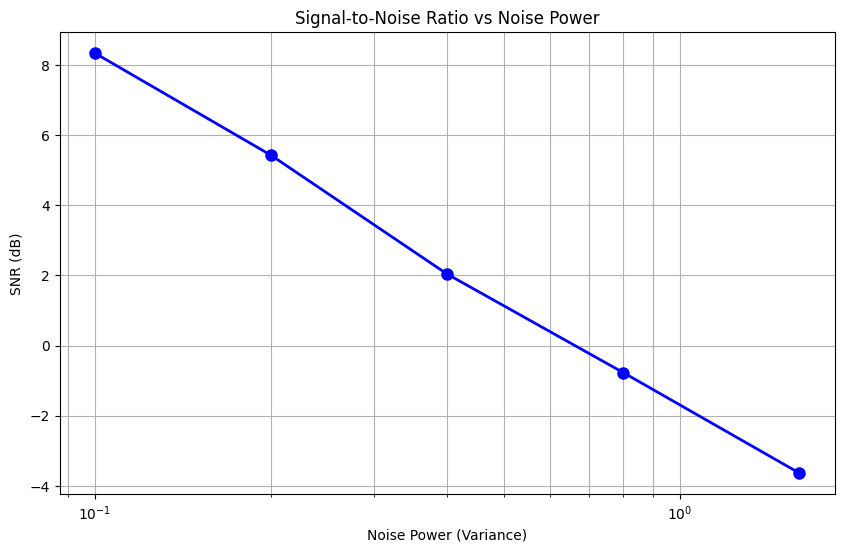

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import gaussian_kde, kstest, norm
import warnings
warnings.filterwarnings("ignore")  # Suppress KDE bandwidth warnings

class SignalGenerator:
    """
    A class to generate signals with multiple harmonics and Gaussian noise.

    Attributes:
        fs (float): Sampling frequency in Hz
        num_samples (int): Number of samples to generate
        time (np.ndarray): Time array for the signal
    """

    def __init__(self, sampling_frequency: float, num_samples: int):
        """
        Initialize the SignalGenerator with sampling parameters.

        Args:
            sampling_frequency: The sampling frequency in Hz
            num_samples: The number of samples to generate
        """
        self.fs = sampling_frequency
        self.num_samples = num_samples
        self.time = np.arange(num_samples) / sampling_frequency

    def generate_signal(self, amplitudes: list, frequencies: list, noise_variance: float = 0.0) -> tuple:
        """
        Generate a signal with harmonics and optional Gaussian noise.

        Args:
            amplitudes: List of amplitudes for each harmonic (up to 3)
            frequencies: List of frequencies for each harmonic in Hz (up to 3)
            noise_variance: Variance of the Gaussian noise to add

        Returns:
            tuple: (time_array, clean_signal, noisy_signal)
        """
        if len(amplitudes) != 3 or len(frequencies) != 3:
            raise ValueError("Amplitudes and frequencies must have exactly 3 elements")

        clean_signal = np.zeros_like(self.time)

        # Generate each harmonic component
        for amp, freq in zip(amplitudes, frequencies):
            if amp != 0 and freq != 0:  # Skip if amplitude or frequency is zero
                clean_signal += amp * np.sin(2 * np.pi * freq * self.time)

        # Add Gaussian noise
        noise = np.random.normal(0, np.sqrt(noise_variance), self.num_samples)
        noisy_signal = clean_signal + noise

        return self.time, clean_signal, noisy_signal

    def calculate_snr(self, clean_signal: np.ndarray, noisy_signal: np.ndarray) -> float:
        """
        Calculate Signal-to-Noise Ratio (SNR) in dB.

        Args:
            clean_signal: The clean signal without noise
            noisy_signal: The signal with noise

        Returns:
            float: SNR in dB
        """
        signal_power = np.mean(clean_signal**2)
        noise_power = np.mean((noisy_signal - clean_signal)**2)
        snr = 10 * np.log10(signal_power / noise_power) if noise_power > 0 else float('inf')
        return snr

    def plot_snr_vs_noise(self, amplitudes: list, frequencies: list,
                         noise_powers: list = [0.1, 0.2, 0.4, 0.8, 1.6]):
        """
        Plot SNR vs noise power for given noise power values.

        Args:
            amplitudes: List of harmonic amplitudes
            frequencies: List of harmonic frequencies
            noise_powers: List of noise power (variance) values to test
        """
        snr_values = []

        print("Noise Power vs SNR Results:")
        print("{:<12} {:<12}".format("Noise Power", "SNR (dB)"))
        print("-"*24)

        for noise_power in noise_powers:
            _, clean_signal, noisy_signal = self.generate_signal(amplitudes, frequencies, noise_power)
            snr = self.calculate_snr(clean_signal, noisy_signal)
            snr_values.append(snr)
            print("{:<12.4f} {:<12.4f}".format(noise_power, snr))

        plt.figure(figsize=(10, 6))
        plt.plot(noise_powers, snr_values, 'bo-', linewidth=2, markersize=8)
        plt.xscale('log')
        plt.xlabel('Noise Power (Variance)')
        plt.ylabel('SNR (dB)')
        plt.title('Signal-to-Noise Ratio vs Noise Power')
        plt.grid(True, which="both", ls="-")
        plt.show()

    def plot_combined_results(self, amplitudes: list, frequencies: list, noise_variance: float,
                            nperseg: int = 256, num_realizations: int = 100, bins: int = 50):
        """
        Plot all results in a 2x2 subplot and print statistics.

        Args:
            amplitudes: List of harmonic amplitudes
            frequencies: List of harmonic frequencies
            noise_variance: Noise variance
            nperseg: Segment length for Welch's method
            num_realizations: Number of realizations for peak statistics
            bins: Number of bins for histograms
        """
        plt.figure(figsize=(16, 12))

        # Generate one realization for time domain and PSD plots
        time, clean_signal, noisy_signal = self.generate_signal(amplitudes, frequencies, noise_variance)

        # 1. Time domain signal (top-left)
        plt.subplot(2, 2, 1)
        plt.plot(time, noisy_signal)
        plt.title('Signal with Harmonics and Noise')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.grid(True)

        # 2. Histogram with KDE (top-right)
        plt.subplot(2, 2, 2)
        abs_signal = np.abs(noisy_signal)
        plt.hist(abs_signal, bins=bins, density=True, alpha=0.6, color='g', label='Histogram')
        kde = gaussian_kde(abs_signal)
        x_vals = np.linspace(0, np.max(abs_signal), 1000)
        plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')
        plt.title('Signal Amplitude Distribution')
        plt.xlabel('Amplitude')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)

        # 3. PSD (bottom-left)
        plt.subplot(2, 2, 3)
        freqs, psd = signal.welch(noisy_signal, fs=self.fs, nperseg=nperseg)
        plt.semilogx(freqs, 10 * np.log10(psd))
        plt.title('Power Spectral Density (Welch\'s Method)')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('PSD [dB/Hz]')
        plt.grid(True, which="both", ls="-")
        plt.xlim([1, self.fs/2])

        # 4. Peak value distribution (bottom-right)
        plt.subplot(2, 2, 4)
        peak_values = self._generate_peak_distribution(amplitudes, frequencies, noise_variance, num_realizations)
        plt.hist(peak_values, bins=bins, density=True, alpha=0.6, color='b', label='Peak Values')

        # Add KDE for peak values
        kde_peaks = gaussian_kde(peak_values)
        x_vals = np.linspace(np.min(peak_values), np.max(peak_values), 1000)
        plt.plot(x_vals, kde_peaks(x_vals), 'k-', linewidth=2, label='KDE')

        # Add theoretical normal distribution if KS test passes
        ks_stat, p_value = kstest(peak_values, 'norm',
                                 args=(np.mean(peak_values), np.std(peak_values)))
        if p_value > 0.05:
            normal_pdf = norm.pdf(x_vals, np.mean(peak_values), np.std(peak_values))
            plt.plot(x_vals, normal_pdf, 'm--', label='Normal Fit')

        plt.title(f'Peak Value Distribution ({num_realizations} realizations)')
        plt.xlabel('Peak Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print statistics
        self._print_peak_statistics(peak_values)

    def _generate_peak_distribution(self, amplitudes: list, frequencies: list,
                                  noise_variance: float, num_realizations: int) -> np.ndarray:
        """
        Generate distribution of peak values from multiple realizations.

        Args:
            amplitudes: List of harmonic amplitudes
            frequencies: List of harmonic frequencies
            noise_variance: Noise variance
            num_realizations: Number of realizations

        Returns:
            np.ndarray: Array of peak values
        """
        peak_values = np.zeros(num_realizations)
        for i in range(num_realizations):
            _, _, noisy_signal = self.generate_signal(amplitudes, frequencies, noise_variance)
            peak_values[i] = np.max(np.abs(noisy_signal))
        return peak_values

    def _print_peak_statistics(self, peak_values: np.ndarray):
        """
        Print statistics of peak values and KS test results.

        Args:
            peak_values: Array of peak values
        """
        print("\nPeak Value Statistics:")
        print(f"Mean: {np.mean(peak_values):.4f}")
        print(f"Median: {np.median(peak_values):.4f}")
        print(f"Variance: {np.var(peak_values):.4f}")
        print(f"Min: {np.min(peak_values):.4f}")
        print(f"Max: {np.max(peak_values):.4f}")

        # Kolmogorov-Smirnov test for normality
        ks_stat, p_value = kstest(peak_values, 'norm',
                                 args=(np.mean(peak_values), np.std(peak_values)))
        print("\nKolmogorov-Smirnov Test for Normality:")
        print(f"KS Statistic: {ks_stat:.4f}")
        print(f"P-value: {p_value:.4f}")
        if p_value > 0.05:
            print("Result: Distribution is normal (fail to reject H0)")
        else:
            print("Result: Distribution is NOT normal (reject H0)")


def main():
    """
    Main function to demonstrate the SignalGenerator class.
    """
    # Configuration parameters
    sampling_frequency = 1000  # Hz
    num_samples = 2000
    amplitudes = [1, 0.5, 0.2]  # Three harmonics with different amplitudes
    frequencies = [10, 30, 60]  # Hz
    noise_variance = 0.1  # Noise variance
    nperseg = 512  # Segment length for Welch's method
    num_realizations = 100  # Number of realizations for peak statistics

    # Create signal generator
    generator = SignalGenerator(sampling_frequency, num_samples)

    # Generate and plot all results
    generator.plot_combined_results(
        amplitudes=amplitudes,
        frequencies=frequencies,
        noise_variance=noise_variance,
        nperseg=nperseg,
        num_realizations=num_realizations
    )

    # Plot SNR vs Noise Power
    generator.plot_snr_vs_noise(
        amplitudes=amplitudes,
        frequencies=frequencies
    )


if __name__ == "__main__":
    main()

taking into account the previous codes but without implementing them again, generate a python script in a new class that performs a passive RC low pass filter, also the filter parameters must be modifiable (capacitance and cutoff frequency and based on that the resistances values are automatically calculated) and real nominal values (not digital filters), the cutoff frequencies must be modifiable in main, print the transfer function and plot the maginitude and phase, for the magnitude graph add the Mark's cutoff frequencies.


RC Low-Pass Filter Parameters:
Cutoff frequency (fc): 100.00 Hz
Capacitance (C): 0.10 μF
Calculated Resistance (R): 15915.49 Ω
Nearest Standard Resistor: 15000.00 Ω (E12 series)

Transfer Function:
H(s) = 1 / (1.5915e-03s + 1)


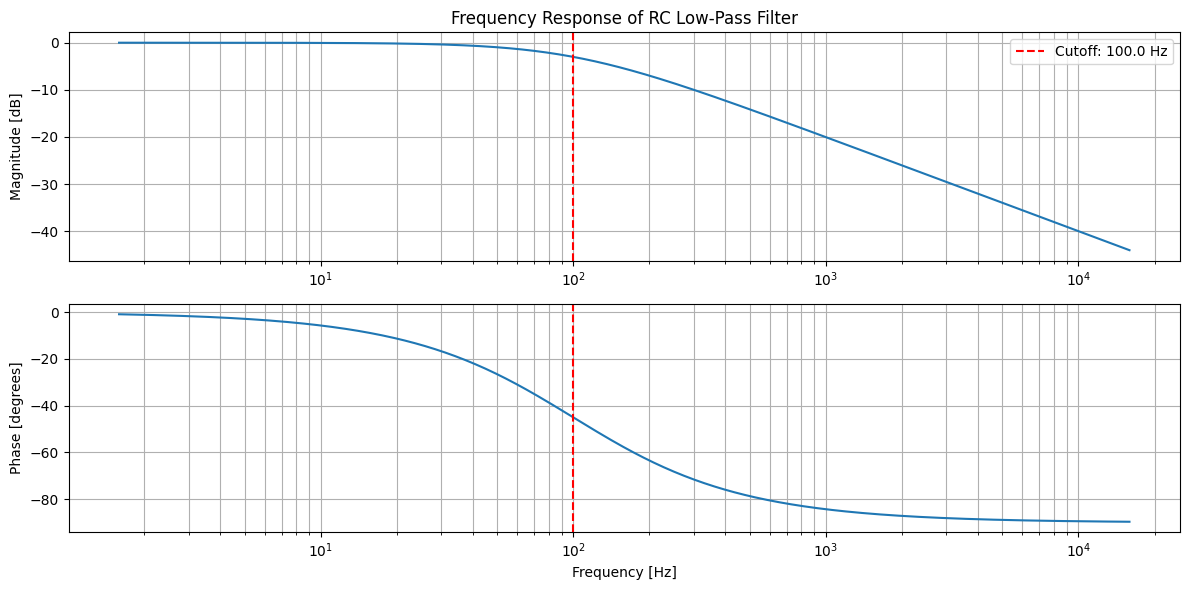


RC Low-Pass Filter Parameters:
Cutoff frequency (fc): 1000.00 Hz
Capacitance (C): 0.10 μF
Calculated Resistance (R): 1591.55 Ω
Nearest Standard Resistor: 1500.00 Ω (E12 series)

Transfer Function:
H(s) = 1 / (1.5915e-04s + 1)


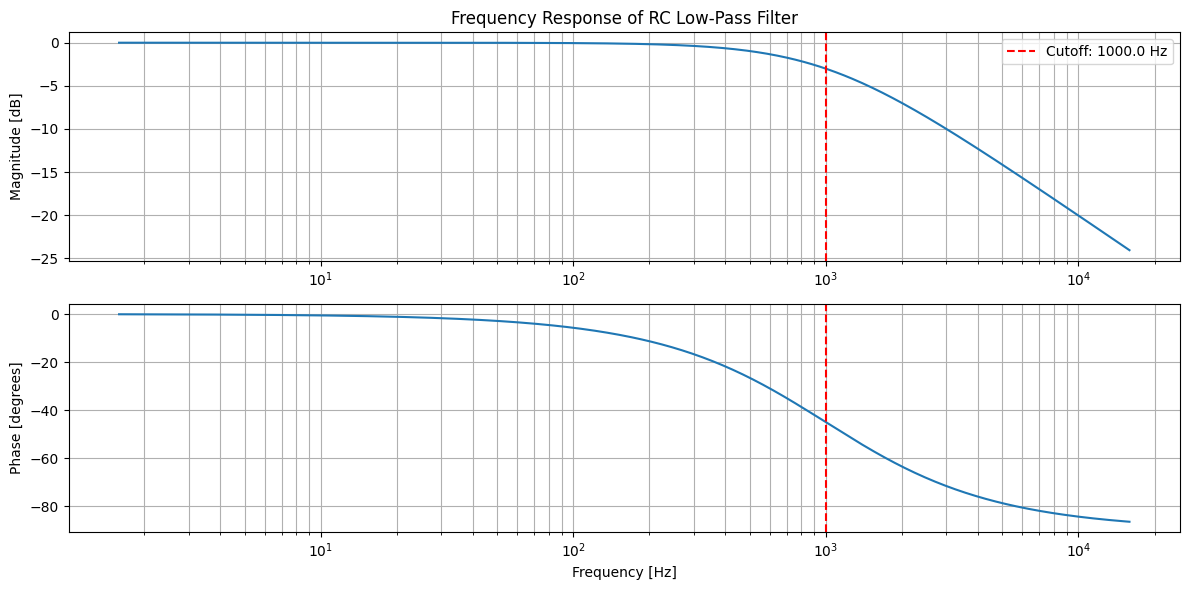


RC Low-Pass Filter Parameters:
Cutoff frequency (fc): 10000.00 Hz
Capacitance (C): 0.10 μF
Calculated Resistance (R): 159.15 Ω
Nearest Standard Resistor: 150.00 Ω (E12 series)

Transfer Function:
H(s) = 1 / (1.5915e-05s + 1)


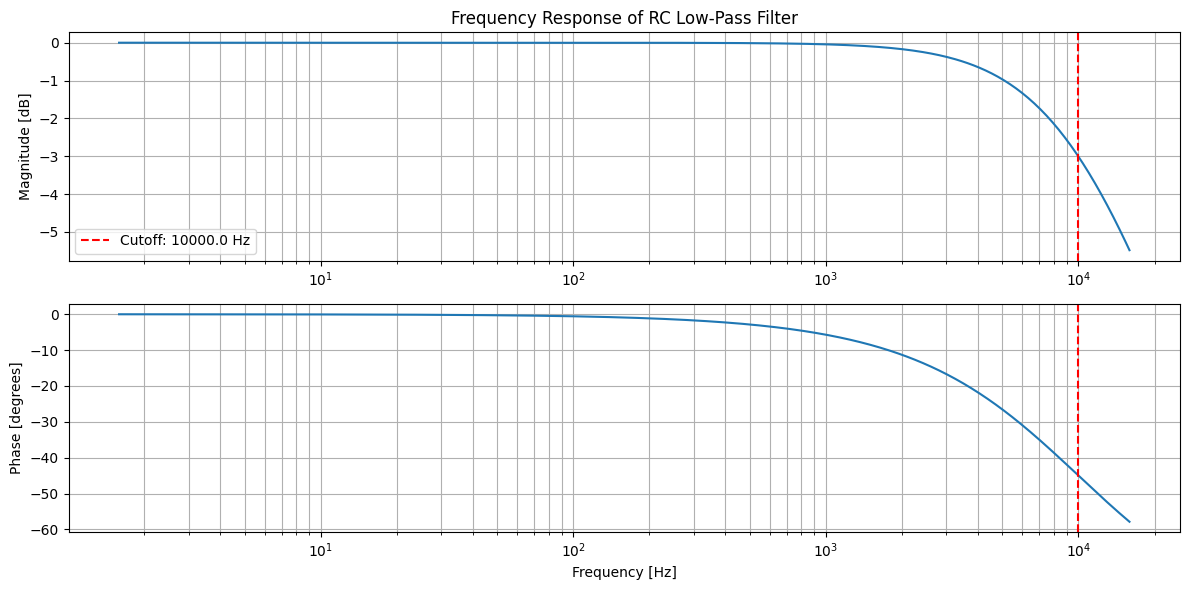

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

class RCLowPassFilter:
    """
    A class to model and analyze a passive RC low-pass filter with real components.

    Attributes:
        cutoff_freq (float): Cutoff frequency in Hz (-3dB point)
        capacitance (float): Capacitance value in Farads
        resistance (float): Resistance value in Ohms (automatically calculated)
    """

    def __init__(self, cutoff_freq: float, capacitance: float = 1e-6):
        """
        Initialize the RC low-pass filter with desired cutoff frequency.

        Args:
            cutoff_freq: Desired cutoff frequency in Hz
            capacitance: Capacitance value in Farads (default: 1μF)
        """
        self.cutoff_freq = cutoff_freq
        self.capacitance = capacitance
        self.resistance = 1 / (2 * np.pi * cutoff_freq * capacitance)

        # Standard E12 resistor values (10% tolerance)
        self.e12_values = np.array([
            1.0, 1.2, 1.5, 1.8, 2.2, 2.7, 3.3, 3.9, 4.7, 5.6, 6.8, 8.2,
            10, 12, 15, 18, 22, 27, 33, 39, 47, 56, 68, 82,
            100, 120, 150, 180, 220, 270, 330, 390, 470, 560, 680, 820,
            1e3, 1.2e3, 1.5e3, 1.8e3, 2.2e3, 2.7e3, 3.3e3, 3.9e3, 4.7e3, 5.6e3, 6.8e3, 8.2e3,
            10e3, 12e3, 15e3, 18e3, 22e3, 27e3, 33e3, 39e3, 47e3, 56e3, 68e3, 82e3,
            100e3, 120e3, 150e3, 180e3, 220e3, 270e3, 330e3, 390e3, 470e3, 560e3, 680e3, 820e3,
            1e6, 1.2e6, 1.5e6, 1.8e6, 2.2e6, 2.7e6, 3.3e6, 3.9e6, 4.7e6, 5.6e6, 6.8e6, 8.2e6
        ])

        # Find nearest standard resistor value
        self.standard_resistance = self.e12_values[np.argmin(np.abs(self.e12_values - self.resistance))]

    def get_transfer_function(self) -> tuple:
        """
        Get the transfer function coefficients of the RC filter.

        Returns:
            tuple: (numerator, denominator) coefficients of the transfer function
        """
        numerator = [1]
        denominator = [self.resistance * self.capacitance, 1]
        return numerator, denominator

    def print_filter_parameters(self):
        """Print the filter parameters and transfer function."""
        print("\nRC Low-Pass Filter Parameters:")
        print(f"Cutoff frequency (fc): {self.cutoff_freq:.2f} Hz")
        print(f"Capacitance (C): {self.capacitance * 1e6:.2f} μF")
        print(f"Calculated Resistance (R): {self.resistance:.2f} Ω")
        print(f"Nearest Standard Resistor: {self.standard_resistance:.2f} Ω (E12 series)")

        num, den = self.get_transfer_function()
        print("\nTransfer Function:")
        print(f"H(s) = {num[0]} / ({den[0]:.4e}s + {den[1]})")

    def plot_frequency_response(self, freq_range: tuple = (1, 1e6)):
        """
        Plot the frequency response (magnitude and phase) of the filter.

        Args:
            freq_range: Tuple of (min_freq, max_freq) for the plot
        """
        num, den = self.get_transfer_function()
        sys = signal.TransferFunction(num, den)

        # Generate frequency points logarithmically spaced
        frequencies = np.logspace(np.log10(freq_range[0]), np.log10(freq_range[1]), 500)
        w, mag, phase = signal.bode(sys, frequencies)

        plt.figure(figsize=(12, 6))

        # Magnitude plot
        plt.subplot(2, 1, 1)
        plt.semilogx(w/(2*np.pi), mag)
        plt.axvline(self.cutoff_freq, color='r', linestyle='--', label=f'Cutoff: {self.cutoff_freq:.1f} Hz')
        plt.title('Frequency Response of RC Low-Pass Filter')
        plt.ylabel('Magnitude [dB]')
        plt.grid(which='both', axis='both')
        plt.legend()

        # Phase plot
        plt.subplot(2, 1, 2)
        plt.semilogx(w/(2*np.pi), phase)
        plt.axvline(self.cutoff_freq, color='r', linestyle='--')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Phase [degrees]')
        plt.grid(which='both', axis='both')

        plt.tight_layout()
        plt.show()


def main():
    """
    Main function to demonstrate the RCLowPassFilter class.
    """
    # Configuration parameters
    cutoff_frequencies = [100, 1000, 10000]  # Hz
    capacitance = 100e-9  # 100nF

    for fc in cutoff_frequencies:
        # Create filter instance
        rc_filter = RCLowPassFilter(cutoff_freq=fc, capacitance=capacitance)

        # Print filter parameters
        rc_filter.print_filter_parameters()

        # Plot frequency response
        rc_filter.plot_frequency_response(freq_range=(10, 1e5))


if __name__ == "__main__":
    main()

Continue with the previous code without modifications and give all the code (previous + next), implement a function inside the previous class to calculate the PSD at the input and output of the filter, use the generator object as the signal, plot in a subplot the input and output PSD.


RC Low-Pass Filter Parameters:
Cutoff frequency (fc): 50.00 Hz
Capacitance (C): 100.00 μF
Calculated Resistance (R): 31.83 Ω
Nearest Standard Resistor: 33.00 Ω (E12 series)

Transfer Function:
H(s) = 1 / (3.1831e-03s + 1)


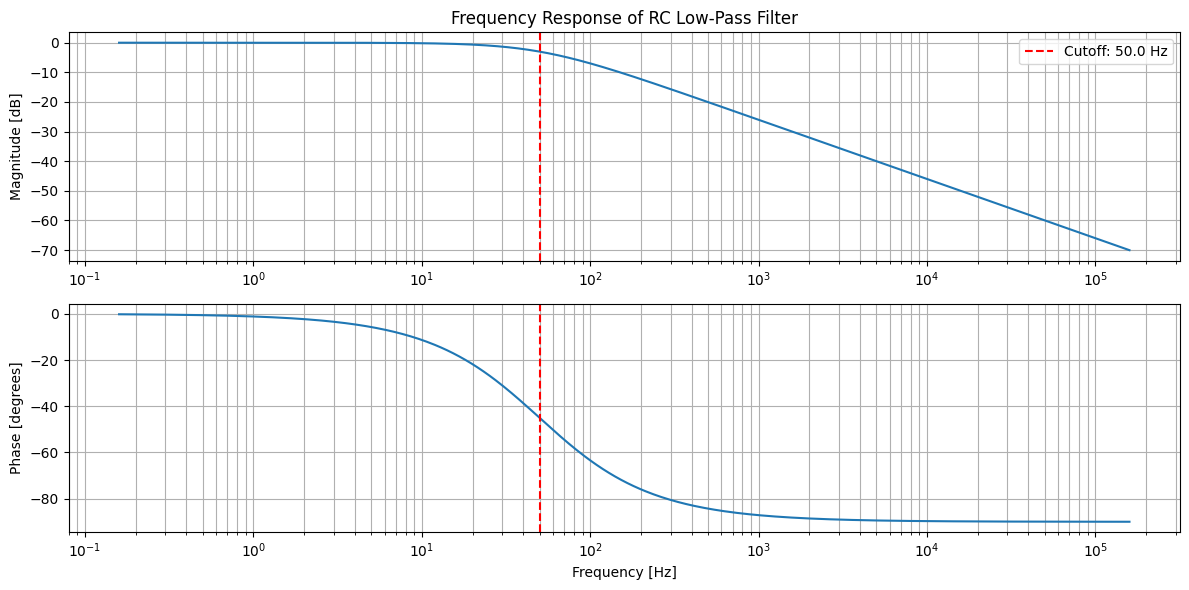

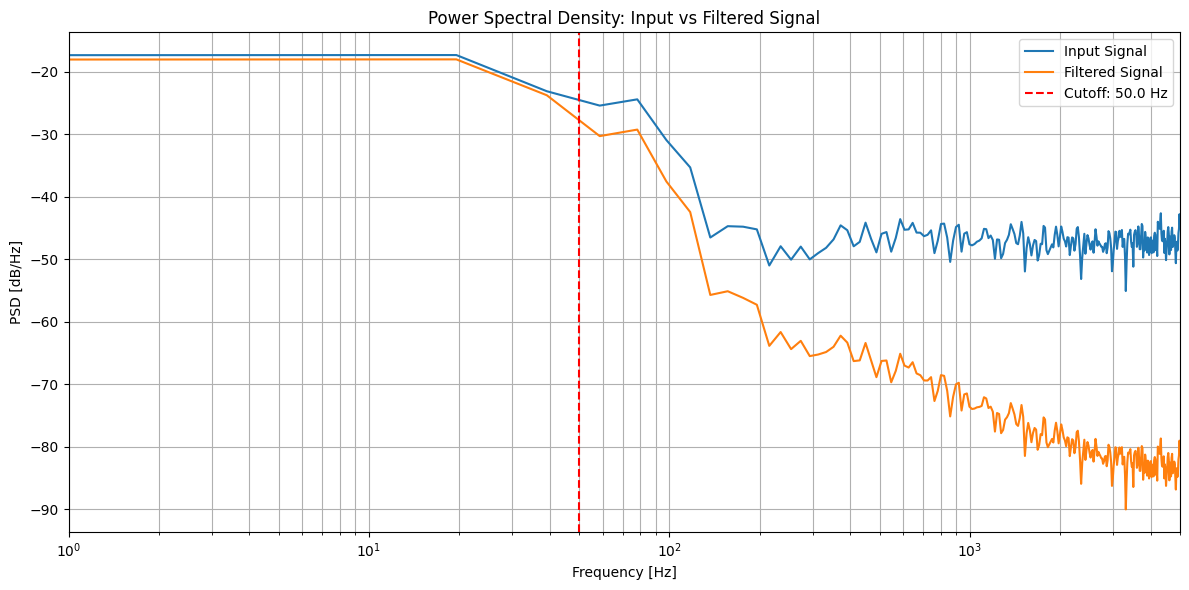

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import gaussian_kde, kstest, norm
import warnings
warnings.filterwarnings("ignore")  # Suppress KDE bandwidth warnings

class SignalGenerator:
    """
    A class to generate signals with multiple harmonics and Gaussian noise.

    Attributes:
        fs (float): Sampling frequency in Hz
        num_samples (int): Number of samples to generate
        time (np.ndarray): Time array for the signal
    """

    def __init__(self, sampling_frequency: float, num_samples: int):
        """
        Initialize the SignalGenerator with sampling parameters.

        Args:
            sampling_frequency: The sampling frequency in Hz
            num_samples: The number of samples to generate
        """
        self.fs = sampling_frequency
        self.num_samples = num_samples
        self.time = np.arange(num_samples) / sampling_frequency

    def generate_signal(self, amplitudes: list, frequencies: list, noise_variance: float = 0.0) -> tuple:
        """
        Generate a signal with harmonics and optional Gaussian noise.

        Args:
            amplitudes: List of amplitudes for each harmonic (up to 3)
            frequencies: List of frequencies for each harmonic in Hz (up to 3)
            noise_variance: Variance of the Gaussian noise to add

        Returns:
            tuple: (time_array, clean_signal, noisy_signal)
        """
        if len(amplitudes) != 3 or len(frequencies) != 3:
            raise ValueError("Amplitudes and frequencies must have exactly 3 elements")

        clean_signal = np.zeros_like(self.time)

        # Generate each harmonic component
        for amp, freq in zip(amplitudes, frequencies):
            if amp != 0 and freq != 0:  # Skip if amplitude or frequency is zero
                clean_signal += amp * np.sin(2 * np.pi * freq * self.time)

        # Add Gaussian noise
        noise = np.random.normal(0, np.sqrt(noise_variance), self.num_samples)
        noisy_signal = clean_signal + noise

        return self.time, clean_signal, noisy_signal

    def calculate_snr(self, clean_signal: np.ndarray, noisy_signal: np.ndarray) -> float:
        """
        Calculate Signal-to-Noise Ratio (SNR) in dB.

        Args:
            clean_signal: The clean signal without noise
            noisy_signal: The signal with noise

        Returns:
            float: SNR in dB
        """
        signal_power = np.mean(clean_signal**2)
        noise_power = np.mean((noisy_signal - clean_signal)**2)
        snr = 10 * np.log10(signal_power / noise_power) if noise_power > 0 else float('inf')
        return snr

    def plot_snr_vs_noise(self, amplitudes: list, frequencies: list,
                         noise_powers: list = [0.1, 0.2, 0.4, 0.8, 1.6]):
        """
        Plot SNR vs noise power for given noise power values.

        Args:
            amplitudes: List of harmonic amplitudes
            frequencies: List of harmonic frequencies
            noise_powers: List of noise power (variance) values to test
        """
        snr_values = []

        print("Noise Power vs SNR Results:")
        print("{:<12} {:<12}".format("Noise Power", "SNR (dB)"))
        print("-"*24)

        for noise_power in noise_powers:
            _, clean_signal, noisy_signal = self.generate_signal(amplitudes, frequencies, noise_power)
            snr = self.calculate_snr(clean_signal, noisy_signal)
            snr_values.append(snr)
            print("{:<12.4f} {:<12.4f}".format(noise_power, snr))

        plt.figure(figsize=(10, 6))
        plt.plot(noise_powers, snr_values, 'bo-', linewidth=2, markersize=8)
        plt.xscale('log')
        plt.xlabel('Noise Power (Variance)')
        plt.ylabel('SNR (dB)')
        plt.title('Signal-to-Noise Ratio vs Noise Power')
        plt.grid(True, which="both", ls="-")
        plt.show()

    def plot_combined_results(self, amplitudes: list, frequencies: list, noise_variance: float,
                            nperseg: int = 256, num_realizations: int = 100, bins: int = 50):
        """
        Plot all results in a 2x2 subplot and print statistics.

        Args:
            amplitudes: List of harmonic amplitudes
            frequencies: List of harmonic frequencies
            noise_variance: Noise variance
            nperseg: Segment length for Welch's method
            num_realizations: Number of realizations for peak statistics
            bins: Number of bins for histograms
        """
        plt.figure(figsize=(16, 12))

        # Generate one realization for time domain and PSD plots
        time, clean_signal, noisy_signal = self.generate_signal(amplitudes, frequencies, noise_variance)

        # 1. Time domain signal (top-left)
        plt.subplot(2, 2, 1)
        plt.plot(time, noisy_signal)
        plt.title('Signal with Harmonics and Noise')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.grid(True)

        # 2. Histogram with KDE (top-right)
        plt.subplot(2, 2, 2)
        abs_signal = np.abs(noisy_signal)
        plt.hist(abs_signal, bins=bins, density=True, alpha=0.6, color='g', label='Histogram')
        kde = gaussian_kde(abs_signal)
        x_vals = np.linspace(0, np.max(abs_signal), 1000)
        plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')
        plt.title('Signal Amplitude Distribution')
        plt.xlabel('Amplitude')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)

        # 3. PSD (bottom-left)
        plt.subplot(2, 2, 3)
        freqs, psd = signal.welch(noisy_signal, fs=self.fs, nperseg=nperseg)
        plt.semilogx(freqs, 10 * np.log10(psd))
        plt.title('Power Spectral Density (Welch\'s Method)')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('PSD [dB/Hz]')
        plt.grid(True, which="both", ls="-")
        plt.xlim([1, self.fs/2])

        # 4. Peak value distribution (bottom-right)
        plt.subplot(2, 2, 4)
        peak_values = self._generate_peak_distribution(amplitudes, frequencies, noise_variance, num_realizations)
        plt.hist(peak_values, bins=bins, density=True, alpha=0.6, color='b', label='Peak Values')

        # Add KDE for peak values
        kde_peaks = gaussian_kde(peak_values)
        x_vals = np.linspace(np.min(peak_values), np.max(peak_values), 1000)
        plt.plot(x_vals, kde_peaks(x_vals), 'k-', linewidth=2, label='KDE')

        # Add theoretical normal distribution if KS test passes
        ks_stat, p_value = kstest(peak_values, 'norm',
                                 args=(np.mean(peak_values), np.std(peak_values)))
        if p_value > 0.05:
            normal_pdf = norm.pdf(x_vals, np.mean(peak_values), np.std(peak_values))
            plt.plot(x_vals, normal_pdf, 'm--', label='Normal Fit')

        plt.title(f'Peak Value Distribution ({num_realizations} realizations)')
        plt.xlabel('Peak Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print statistics
        self._print_peak_statistics(peak_values)

    def _generate_peak_distribution(self, amplitudes: list, frequencies: list,
                                  noise_variance: float, num_realizations: int) -> np.ndarray:
        """
        Generate distribution of peak values from multiple realizations.

        Args:
            amplitudes: List of harmonic amplitudes
            frequencies: List of harmonic frequencies
            noise_variance: Noise variance
            num_realizations: Number of realizations

        Returns:
            np.ndarray: Array of peak values
        """
        peak_values = np.zeros(num_realizations)
        for i in range(num_realizations):
            _, _, noisy_signal = self.generate_signal(amplitudes, frequencies, noise_variance)
            peak_values[i] = np.max(np.abs(noisy_signal))
        return peak_values

    def _print_peak_statistics(self, peak_values: np.ndarray):
        """
        Print statistics of peak values and KS test results.

        Args:
            peak_values: Array of peak values
        """
        print("\nPeak Value Statistics:")
        print(f"Mean: {np.mean(peak_values):.4f}")
        print(f"Median: {np.median(peak_values):.4f}")
        print(f"Variance: {np.var(peak_values):.4f}")
        print(f"Min: {np.min(peak_values):.4f}")
        print(f"Max: {np.max(peak_values):.4f}")

        # Kolmogorov-Smirnov test for normality
        ks_stat, p_value = kstest(peak_values, 'norm',
                                 args=(np.mean(peak_values), np.std(peak_values)))
        print("\nKolmogorov-Smirnov Test for Normality:")
        print(f"KS Statistic: {ks_stat:.4f}")
        print(f"P-value: {p_value:.4f}")
        if p_value > 0.05:
            print("Result: Distribution is normal (fail to reject H0)")
        else:
            print("Result: Distribution is NOT normal (reject H0)")


class RCLowPassFilter:
    """
    A class to model and analyze a passive RC low-pass filter with real components.

    Attributes:
        cutoff_freq (float): Cutoff frequency in Hz (-3dB point)
        capacitance (float): Capacitance value in Farads
        resistance (float): Resistance value in Ohms (automatically calculated)
    """

    def __init__(self, cutoff_freq: float, capacitance: float = 1e-6):
        """
        Initialize the RC low-pass filter with desired cutoff frequency.

        Args:
            cutoff_freq: Desired cutoff frequency in Hz
            capacitance: Capacitance value in Farads (default: 1μF)
        """
        self.cutoff_freq = cutoff_freq
        self.capacitance = capacitance
        self.resistance = 1 / (2 * np.pi * cutoff_freq * capacitance)

        # Standard E12 resistor values (10% tolerance)
        self.e12_values = np.array([
            1.0, 1.2, 1.5, 1.8, 2.2, 2.7, 3.3, 3.9, 4.7, 5.6, 6.8, 8.2,
            10, 12, 15, 18, 22, 27, 33, 39, 47, 56, 68, 82,
            100, 120, 150, 180, 220, 270, 330, 390, 470, 560, 680, 820,
            1e3, 1.2e3, 1.5e3, 1.8e3, 2.2e3, 2.7e3, 3.3e3, 3.9e3, 4.7e3, 5.6e3, 6.8e3, 8.2e3,
            10e3, 12e3, 15e3, 18e3, 22e3, 27e3, 33e3, 39e3, 47e3, 56e3, 68e3, 82e3,
            100e3, 120e3, 150e3, 180e3, 220e3, 270e3, 330e3, 390e3, 470e3, 560e3, 680e3, 820e3,
            1e6, 1.2e6, 1.5e6, 1.8e6, 2.2e6, 2.7e6, 3.3e6, 3.9e6, 4.7e6, 5.6e6, 6.8e6, 8.2e6
        ])

        # Find nearest standard resistor value
        self.standard_resistance = self.e12_values[np.argmin(np.abs(self.e12_values - self.resistance))]

    def get_transfer_function(self) -> tuple:
        """
        Get the transfer function coefficients of the RC filter.

        Returns:
            tuple: (numerator, denominator) coefficients of the transfer function
        """
        numerator = [1]
        denominator = [self.resistance * self.capacitance, 1]
        return numerator, denominator

    def print_filter_parameters(self):
        """Print the filter parameters and transfer function."""
        print("\nRC Low-Pass Filter Parameters:")
        print(f"Cutoff frequency (fc): {self.cutoff_freq:.2f} Hz")
        print(f"Capacitance (C): {self.capacitance * 1e6:.2f} μF")
        print(f"Calculated Resistance (R): {self.resistance:.2f} Ω")
        print(f"Nearest Standard Resistor: {self.standard_resistance:.2f} Ω (E12 series)")

        num, den = self.get_transfer_function()
        print("\nTransfer Function:")
        print(f"H(s) = {num[0]} / ({den[0]:.4e}s + {den[1]})")

    def plot_frequency_response(self, freq_range: tuple = (1, 1e6)):
        """
        Plot the frequency response (magnitude and phase) of the filter.

        Args:
            freq_range: Tuple of (min_freq, max_freq) for the plot
        """
        num, den = self.get_transfer_function()
        sys = signal.TransferFunction(num, den)

        # Generate frequency points logarithmically spaced
        frequencies = np.logspace(np.log10(freq_range[0]), np.log10(freq_range[1]), 500)
        w, mag, phase = signal.bode(sys, frequencies)

        plt.figure(figsize=(12, 6))

        # Magnitude plot
        plt.subplot(2, 1, 1)
        plt.semilogx(w/(2*np.pi), mag)
        plt.axvline(self.cutoff_freq, color='r', linestyle='--', label=f'Cutoff: {self.cutoff_freq:.1f} Hz')
        plt.title('Frequency Response of RC Low-Pass Filter')
        plt.ylabel('Magnitude [dB]')
        plt.grid(which='both', axis='both')
        plt.legend()

        # Phase plot
        plt.subplot(2, 1, 2)
        plt.semilogx(w/(2*np.pi), phase)
        plt.axvline(self.cutoff_freq, color='r', linestyle='--')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Phase [degrees]')
        plt.grid(which='both', axis='both')

        plt.tight_layout()
        plt.show()

    def plot_filtered_psd_comparison(self, signal_generator: SignalGenerator,
                                    amplitudes: list, frequencies: list,
                                    noise_variance: float, nperseg: int = 256):
        """
        Plot PSD comparison of input and filtered output signals.

        Args:
            signal_generator: SignalGenerator instance
            amplitudes: List of harmonic amplitudes
            frequencies: List of harmonic frequencies
            noise_variance: Noise variance
            nperseg: Segment length for Welch's method
        """
        # Generate input signal
        time, _, input_signal = signal_generator.generate_signal(amplitudes, frequencies, noise_variance)

        # Simulate RC filter effect (1st order approximation)
        num, den = self.get_transfer_function()
        dt = 1/signal_generator.fs
        rc = self.resistance * self.capacitance

        # Digital filter approximation (using bilinear transform)
        b = [dt]  # numerator coefficients
        a = [rc + dt, -rc]  # denominator coefficients

        # Apply filter
        output_signal = signal.lfilter(b, a, input_signal)

        # Compute PSDs
        freqs_in, psd_in = signal.welch(input_signal, fs=signal_generator.fs, nperseg=nperseg)
        freqs_out, psd_out = signal.welch(output_signal, fs=signal_generator.fs, nperseg=nperseg)

        plt.figure(figsize=(12, 6))

        # Plot PSD comparison
        plt.semilogx(freqs_in, 10 * np.log10(psd_in), label='Input Signal')
        plt.semilogx(freqs_out, 10 * np.log10(psd_out), label='Filtered Signal')
        plt.axvline(self.cutoff_freq, color='r', linestyle='--', label=f'Cutoff: {self.cutoff_freq:.1f} Hz')

        plt.title('Power Spectral Density: Input vs Filtered Signal')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('PSD [dB/Hz]')
        plt.grid(which='both', axis='both')
        plt.legend()
        plt.xlim([1, signal_generator.fs/2])
        plt.tight_layout()
        plt.show()


def main():
    """
    Main function to demonstrate the complete system.
    """
    # Signal generator parameters
    sampling_frequency = 10000  # Hz
    num_samples = 2000
    amplitudes = [1, 0.5, 0.2]  # Three harmonics with different amplitudes
    frequencies = [20, 70,100]  # Hz
    noise_variance = 0.1  # Noise variance
    nperseg = 512  # Segment length for Welch's method

    # Create signal generator
    generator = SignalGenerator(sampling_frequency, num_samples)

    # RC filter parameters
    cutoff_freq = 50  # Hz
    capacitance = 100e-6  # 100μF

    # Create RC filter
    rc_filter = RCLowPassFilter(cutoff_freq=cutoff_freq, capacitance=capacitance)
    rc_filter.print_filter_parameters()
    rc_filter.plot_frequency_response()

    # Plot PSD comparison
    rc_filter.plot_filtered_psd_comparison(
        signal_generator=generator,
        amplitudes=amplitudes,
        frequencies=frequencies,
        noise_variance=noise_variance,
        nperseg=nperseg
    )


if __name__ == "__main__":
    main()

Continue with the previous code without modifications and provide the complete code (old part + new part). Implement a method within the same class to calculate the impulse response of the low-pass filter (normalize this impulse response). Generate all corresponding plots in a single figure using a 2 row by 2 column layout (Bode magnitude plot, Bode phase plot, power spectral density, impulse response).


RC Low-Pass Filter Parameters:
Cutoff frequency (fc): 20.00 Hz
Capacitance (C): 100.00 μF
Calculated Resistance (R): 79.58 Ω
Nearest Standard Resistor: 82.00 Ω (E12 series)

Transfer Function:
H(s) = 1 / (7.9577e-03s + 1)


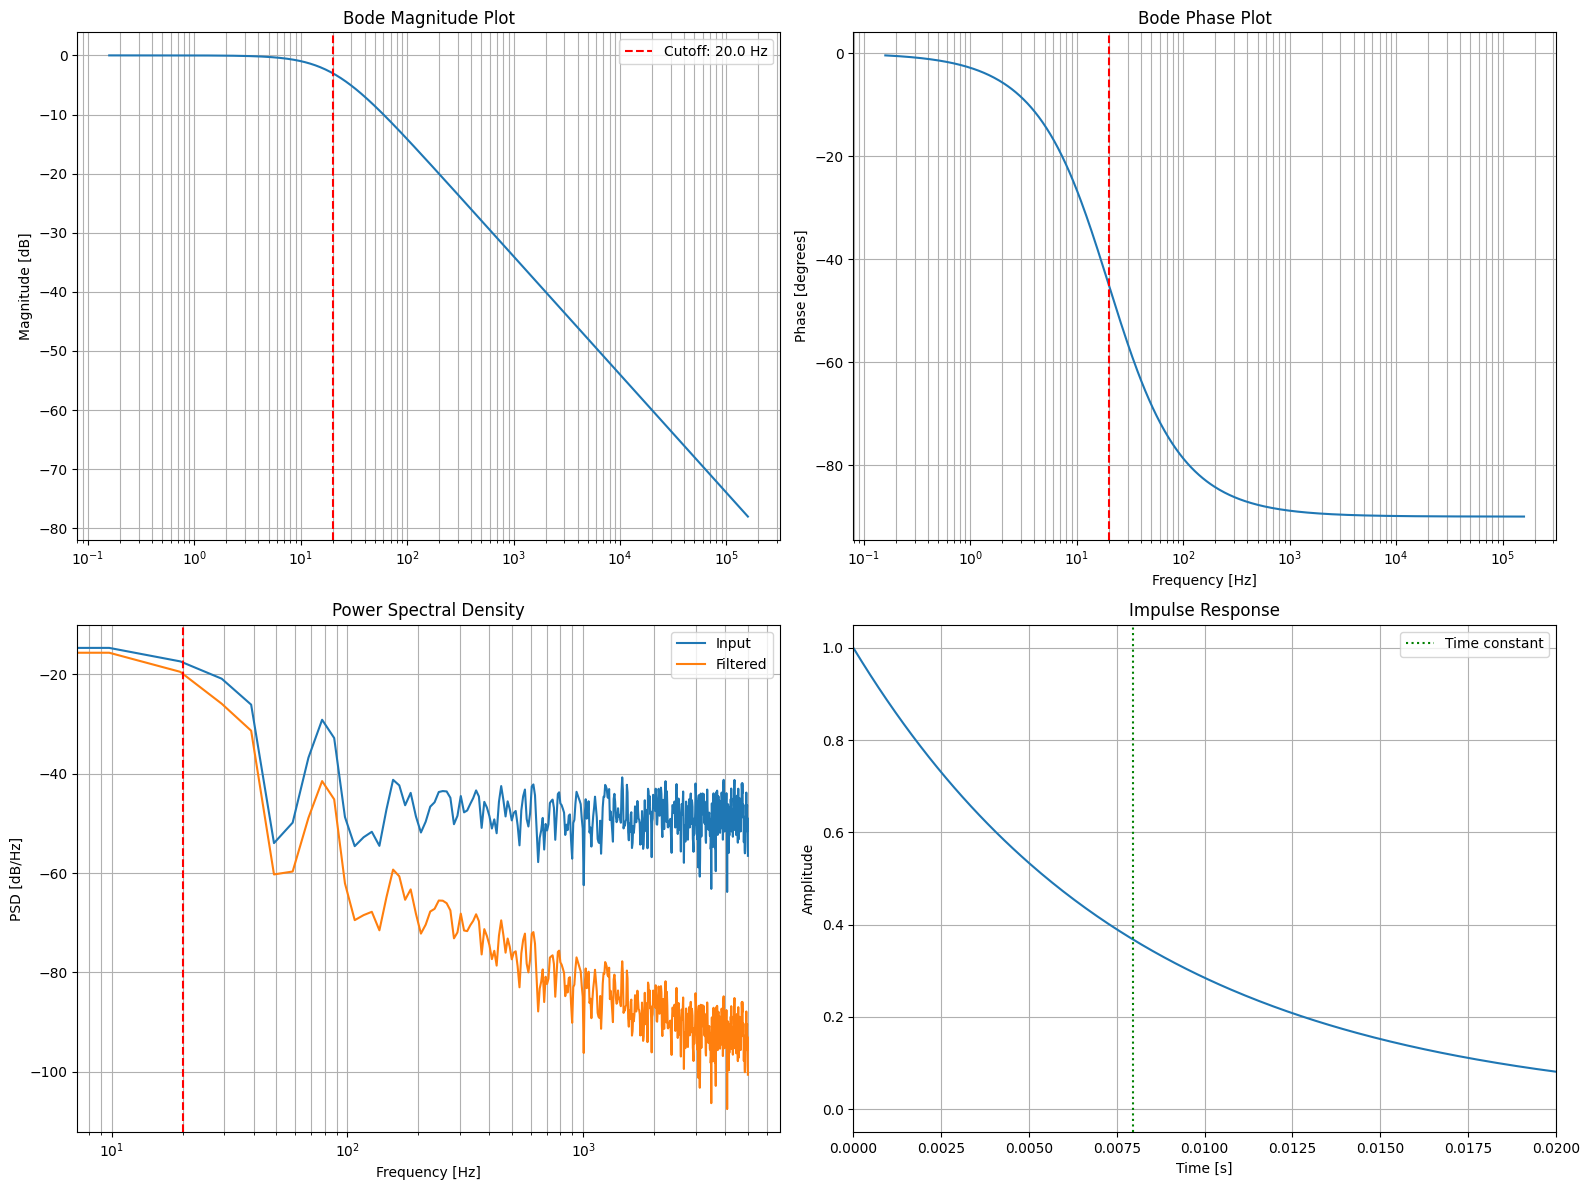

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import gaussian_kde, kstest, norm
import warnings
warnings.filterwarnings("ignore")  # Suppress KDE bandwidth warnings

class SignalGenerator:
    """
    A class to generate signals with multiple harmonics and Gaussian noise.

    Attributes:
        fs (float): Sampling frequency in Hz
        num_samples (int): Number of samples to generate
        time (np.ndarray): Time array for the signal
    """

    def __init__(self, sampling_frequency: float, num_samples: int):
        """
        Initialize the SignalGenerator with sampling parameters.

        Args:
            sampling_frequency: The sampling frequency in Hz
            num_samples: The number of samples to generate
        """
        self.fs = sampling_frequency
        self.num_samples = num_samples
        self.time = np.arange(num_samples) / sampling_frequency

    def generate_signal(self, amplitudes: list, frequencies: list, noise_variance: float = 0.0) -> tuple:
        """
        Generate a signal with harmonics and optional Gaussian noise.

        Args:
            amplitudes: List of amplitudes for each harmonic (up to 3)
            frequencies: List of frequencies for each harmonic in Hz (up to 3)
            noise_variance: Variance of the Gaussian noise to add

        Returns:
            tuple: (time_array, clean_signal, noisy_signal)
        """
        if len(amplitudes) != 3 or len(frequencies) != 3:
            raise ValueError("Amplitudes and frequencies must have exactly 3 elements")

        clean_signal = np.zeros_like(self.time)

        # Generate each harmonic component
        for amp, freq in zip(amplitudes, frequencies):
            if amp != 0 and freq != 0:  # Skip if amplitude or frequency is zero
                clean_signal += amp * np.sin(2 * np.pi * freq * self.time)

        # Add Gaussian noise
        noise = np.random.normal(0, np.sqrt(noise_variance), self.num_samples)
        noisy_signal = clean_signal + noise

        return self.time, clean_signal, noisy_signal

    def calculate_snr(self, clean_signal: np.ndarray, noisy_signal: np.ndarray) -> float:
        """
        Calculate Signal-to-Noise Ratio (SNR) in dB.

        Args:
            clean_signal: The clean signal without noise
            noisy_signal: The signal with noise

        Returns:
            float: SNR in dB
        """
        signal_power = np.mean(clean_signal**2)
        noise_power = np.mean((noisy_signal - clean_signal)**2)
        snr = 10 * np.log10(signal_power / noise_power) if noise_power > 0 else float('inf')
        return snr

    def plot_snr_vs_noise(self, amplitudes: list, frequencies: list,
                         noise_powers: list = [0.1, 0.2, 0.4, 0.8, 1.6]):
        """
        Plot SNR vs noise power for given noise power values.

        Args:
            amplitudes: List of harmonic amplitudes
            frequencies: List of harmonic frequencies
            noise_powers: List of noise power (variance) values to test
        """
        snr_values = []

        print("Noise Power vs SNR Results:")
        print("{:<12} {:<12}".format("Noise Power", "SNR (dB)"))
        print("-"*24)

        for noise_power in noise_powers:
            _, clean_signal, noisy_signal = self.generate_signal(amplitudes, frequencies, noise_power)
            snr = self.calculate_snr(clean_signal, noisy_signal)
            snr_values.append(snr)
            print("{:<12.4f} {:<12.4f}".format(noise_power, snr))

        plt.figure(figsize=(10, 6))
        plt.plot(noise_powers, snr_values, 'bo-', linewidth=2, markersize=8)
        plt.xscale('log')
        plt.xlabel('Noise Power (Variance)')
        plt.ylabel('SNR (dB)')
        plt.title('Signal-to-Noise Ratio vs Noise Power')
        plt.grid(True, which="both", ls="-")
        plt.show()

    def plot_combined_results(self, amplitudes: list, frequencies: list, noise_variance: float,
                            nperseg: int = 256, num_realizations: int = 100, bins: int = 50):
        """
        Plot all results in a 2x2 subplot and print statistics.

        Args:
            amplitudes: List of harmonic amplitudes
            frequencies: List of harmonic frequencies
            noise_variance: Noise variance
            nperseg: Segment length for Welch's method
            num_realizations: Number of realizations for peak statistics
            bins: Number of bins for histograms
        """
        plt.figure(figsize=(16, 12))

        # Generate one realization for time domain and PSD plots
        time, clean_signal, noisy_signal = self.generate_signal(amplitudes, frequencies, noise_variance)

        # 1. Time domain signal (top-left)
        plt.subplot(2, 2, 1)
        plt.plot(time, noisy_signal)
        plt.title('Signal with Harmonics and Noise')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.grid(True)

        # 2. Histogram with KDE (top-right)
        plt.subplot(2, 2, 2)
        abs_signal = np.abs(noisy_signal)
        plt.hist(abs_signal, bins=bins, density=True, alpha=0.6, color='g', label='Histogram')
        kde = gaussian_kde(abs_signal)
        x_vals = np.linspace(0, np.max(abs_signal), 1000)
        plt.plot(x_vals, kde(x_vals), 'r-', linewidth=2, label='KDE')
        plt.title('Signal Amplitude Distribution')
        plt.xlabel('Amplitude')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)

        # 3. PSD (bottom-left)
        plt.subplot(2, 2, 3)
        freqs, psd = signal.welch(noisy_signal, fs=self.fs, nperseg=nperseg)
        plt.semilogx(freqs, 10 * np.log10(psd))
        plt.title('Power Spectral Density (Welch\'s Method)')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('PSD [dB/Hz]')
        plt.grid(True, which="both", ls="-")
        plt.xlim([1, self.fs/2])

        # 4. Peak value distribution (bottom-right)
        plt.subplot(2, 2, 4)
        peak_values = self._generate_peak_distribution(amplitudes, frequencies, noise_variance, num_realizations)
        plt.hist(peak_values, bins=bins, density=True, alpha=0.6, color='b', label='Peak Values')

        # Add KDE for peak values
        kde_peaks = gaussian_kde(peak_values)
        x_vals = np.linspace(np.min(peak_values), np.max(peak_values), 1000)
        plt.plot(x_vals, kde_peaks(x_vals), 'k-', linewidth=2, label='KDE')

        # Add theoretical normal distribution if KS test passes
        ks_stat, p_value = kstest(peak_values, 'norm',
                                 args=(np.mean(peak_values), np.std(peak_values)))
        if p_value > 0.05:
            normal_pdf = norm.pdf(x_vals, np.mean(peak_values), np.std(peak_values))
            plt.plot(x_vals, normal_pdf, 'm--', label='Normal Fit')

        plt.title(f'Peak Value Distribution ({num_realizations} realizations)')
        plt.xlabel('Peak Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Print statistics
        self._print_peak_statistics(peak_values)

    def _generate_peak_distribution(self, amplitudes: list, frequencies: list,
                                  noise_variance: float, num_realizations: int) -> np.ndarray:
        """
        Generate distribution of peak values from multiple realizations.

        Args:
            amplitudes: List of harmonic amplitudes
            frequencies: List of harmonic frequencies
            noise_variance: Noise variance
            num_realizations: Number of realizations

        Returns:
            np.ndarray: Array of peak values
        """
        peak_values = np.zeros(num_realizations)
        for i in range(num_realizations):
            _, _, noisy_signal = self.generate_signal(amplitudes, frequencies, noise_variance)
            peak_values[i] = np.max(np.abs(noisy_signal))
        return peak_values

    def _print_peak_statistics(self, peak_values: np.ndarray):
        """
        Print statistics of peak values and KS test results.

        Args:
            peak_values: Array of peak values
        """
        print("\nPeak Value Statistics:")
        print(f"Mean: {np.mean(peak_values):.4f}")
        print(f"Median: {np.median(peak_values):.4f}")
        print(f"Variance: {np.var(peak_values):.4f}")
        print(f"Min: {np.min(peak_values):.4f}")
        print(f"Max: {np.max(peak_values):.4f}")

        # Kolmogorov-Smirnov test for normality
        ks_stat, p_value = kstest(peak_values, 'norm',
                                 args=(np.mean(peak_values), np.std(peak_values)))
        print("\nKolmogorov-Smirnov Test for Normality:")
        print(f"KS Statistic: {ks_stat:.4f}")
        print(f"P-value: {p_value:.4f}")
        if p_value > 0.05:
            print("Result: Distribution is normal (fail to reject H0)")
        else:
            print("Result: Distribution is NOT normal (reject H0)")


class RCLowPassFilter:
    """
    A class to model and analyze a passive RC low-pass filter with real components.

    Attributes:
        cutoff_freq (float): Cutoff frequency in Hz (-3dB point)
        capacitance (float): Capacitance value in Farads
        resistance (float): Resistance value in Ohms (automatically calculated)
    """

    def __init__(self, cutoff_freq: float, capacitance: float = 1e-6):
        """
        Initialize the RC low-pass filter with desired cutoff frequency.

        Args:
            cutoff_freq: Desired cutoff frequency in Hz
            capacitance: Capacitance value in Farads (default: 1μF)
        """
        self.cutoff_freq = cutoff_freq
        self.capacitance = capacitance
        self.resistance = 1 / (2 * np.pi * cutoff_freq * capacitance)

        # Standard E12 resistor values (10% tolerance)
        self.e12_values = np.array([
            1.0, 1.2, 1.5, 1.8, 2.2, 2.7, 3.3, 3.9, 4.7, 5.6, 6.8, 8.2,
            10, 12, 15, 18, 22, 27, 33, 39, 47, 56, 68, 82,
            100, 120, 150, 180, 220, 270, 330, 390, 470, 560, 680, 820,
            1e3, 1.2e3, 1.5e3, 1.8e3, 2.2e3, 2.7e3, 3.3e3, 3.9e3, 4.7e3, 5.6e3, 6.8e3, 8.2e3,
            10e3, 12e3, 15e3, 18e3, 22e3, 27e3, 33e3, 39e3, 47e3, 56e3, 68e3, 82e3,
            100e3, 120e3, 150e3, 180e3, 220e3, 270e3, 330e3, 390e3, 470e3, 560e3, 680e3, 820e3,
            1e6, 1.2e6, 1.5e6, 1.8e6, 2.2e6, 2.7e6, 3.3e6, 3.9e6, 4.7e6, 5.6e6, 6.8e6, 8.2e6
        ])

        # Find nearest standard resistor value
        self.standard_resistance = self.e12_values[np.argmin(np.abs(self.e12_values - self.resistance))]

    def get_transfer_function(self) -> tuple:
        """
        Get the transfer function coefficients of the RC filter.

        Returns:
            tuple: (numerator, denominator) coefficients of the transfer function
        """
        numerator = [1]
        denominator = [self.resistance * self.capacitance, 1]
        return numerator, denominator

    def print_filter_parameters(self):
        """Print the filter parameters and transfer function."""
        print("\nRC Low-Pass Filter Parameters:")
        print(f"Cutoff frequency (fc): {self.cutoff_freq:.2f} Hz")
        print(f"Capacitance (C): {self.capacitance * 1e6:.2f} μF")
        print(f"Calculated Resistance (R): {self.resistance:.2f} Ω")
        print(f"Nearest Standard Resistor: {self.standard_resistance:.2f} Ω (E12 series)")

        num, den = self.get_transfer_function()
        print("\nTransfer Function:")
        print(f"H(s) = {num[0]} / ({den[0]:.4e}s + {den[1]})")

    def get_impulse_response(self, duration: float = 0.1) -> tuple:
        """
        Calculate the impulse response of the filter.

        Args:
            duration: Duration of the impulse response in seconds

        Returns:
            tuple: (time_array, impulse_response)
        """
        # Time array with 100 points per expected time constant
        time_constant = self.resistance * self.capacitance
        num_points = max(100, int(duration / time_constant * 100))
        t = np.linspace(0, duration, num_points)

        # Analog impulse response
        h = (1/(self.resistance*self.capacitance)) * np.exp(-t/(self.resistance*self.capacitance))
        h_max_norm = h / np.max(np.abs(h))
        return t, h_max_norm

    def plot_comprehensive_response(self, signal_generator: SignalGenerator = None,
                                  amplitudes: list = None, frequencies: list = None,
                                  noise_variance: float = 0.0, nperseg: int = 256):
        """
        Plot comprehensive filter analysis in a 2x2 subplot layout.

        Args:
            signal_generator: SignalGenerator instance (optional)
            amplitudes: List of harmonic amplitudes (optional)
            frequencies: List of harmonic frequencies (optional)
            noise_variance: Noise variance (default: 0)
            nperseg: Segment length for Welch's method
        """
        plt.figure(figsize=(16, 12))

        # 1. Bode Magnitude Plot (top-left)
        plt.subplot(2, 2, 1)
        num, den = self.get_transfer_function()
        sys = signal.TransferFunction(num, den)
        w, mag, _ = signal.bode(sys, np.logspace(0, 6, 500))
        plt.semilogx(w/(2*np.pi), mag)
        plt.axvline(self.cutoff_freq, color='r', linestyle='--', label=f'Cutoff: {self.cutoff_freq:.1f} Hz')
        plt.title('Bode Magnitude Plot')
        plt.ylabel('Magnitude [dB]')
        plt.grid(which='both', axis='both')
        plt.legend()

        # 2. Bode Phase Plot (top-right)
        plt.subplot(2, 2, 2)
        _, _, phase = signal.bode(sys, np.logspace(0, 6, 500))
        plt.semilogx(w/(2*np.pi), phase)
        plt.axvline(self.cutoff_freq, color='r', linestyle='--')
        plt.title('Bode Phase Plot')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Phase [degrees]')
        plt.grid(which='both', axis='both')

        # 3. PSD Comparison (bottom-left)
        plt.subplot(2, 2, 3)
        if signal_generator is not None and amplitudes is not None and frequencies is not None:
            time, _, input_signal = signal_generator.generate_signal(amplitudes, frequencies, noise_variance)

            # Digital filter approximation
            dt = 1/signal_generator.fs
            b = [dt]
            a = [self.resistance*self.capacitance + dt, -self.resistance*self.capacitance]
            output_signal = signal.lfilter(b, a, input_signal)

            # Compute PSDs
            freqs_in, psd_in = signal.welch(input_signal, fs=signal_generator.fs, nperseg=nperseg)
            freqs_out, psd_out = signal.welch(output_signal, fs=signal_generator.fs, nperseg=nperseg)

            plt.semilogx(freqs_in, 10 * np.log10(psd_in), label='Input')
            plt.semilogx(freqs_out, 10 * np.log10(psd_out), label='Filtered')
            plt.axvline(self.cutoff_freq, color='r', linestyle='--')
            plt.title('Power Spectral Density')
            plt.xlabel('Frequency [Hz]')
            plt.ylabel('PSD [dB/Hz]')
            plt.legend()
        else:
            plt.title('PSD Comparison (No signal provided)')
        plt.grid(which='both', axis='both')

        # 4. Impulse Response (bottom-right)
        plt.subplot(2, 2, 4)
        t, h_max_norm = self.get_impulse_response()
        plt.plot(t, h_max_norm)
        plt.axvline(self.resistance*self.capacitance, color='g', linestyle=':', label='Time constant')
        plt.title('Impulse Response')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.xlim([0, 0.02])
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def plot_filtered_psd_comparison(self, signal_generator: SignalGenerator,
                                    amplitudes: list, frequencies: list,
                                    noise_variance: float, nperseg: int = 256):
        """
        Plot PSD comparison of input and filtered output signals.

        Args:
            signal_generator: SignalGenerator instance
            amplitudes: List of harmonic amplitudes
            frequencies: List of harmonic frequencies
            noise_variance: Noise variance
            nperseg: Segment length for Welch's method
        """
        # Generate input signal
        time, _, input_signal = signal_generator.generate_signal(amplitudes, frequencies, noise_variance)

        # Simulate RC filter effect (1st order approximation)
        num, den = self.get_transfer_function()
        dt = 1/signal_generator.fs
        rc = self.resistance * self.capacitance

        # Digital filter approximation (using bilinear transform)
        b = [dt]  # numerator coefficients
        a = [rc + dt, -rc]  # denominator coefficients

        # Apply filter
        output_signal = signal.lfilter(b, a, input_signal)

        # Compute PSDs
        freqs_in, psd_in = signal.welch(input_signal, fs=signal_generator.fs, nperseg=nperseg)
        freqs_out, psd_out = signal.welch(output_signal, fs=signal_generator.fs, nperseg=nperseg)

        plt.figure(figsize=(12, 6))

        # Plot PSD comparison
        plt.semilogx(freqs_in, 10 * np.log10(psd_in), label='Input Signal')
        plt.semilogx(freqs_out, 10 * np.log10(psd_out), label='Filtered Signal')
        plt.axvline(self.cutoff_freq, color='r', linestyle='--', label=f'Cutoff: {self.cutoff_freq:.1f} Hz')

        plt.title('Power Spectral Density: Input vs Filtered Signal')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('PSD [dB/Hz]')
        plt.grid(which='both', axis='both')
        plt.legend()
        plt.xlim([1, signal_generator.fs/2])
        plt.tight_layout()
        plt.show()


def main():
    """
    Main function to demonstrate the complete system.
    """
    # Signal generator parameters
    sampling_frequency = 10000  # Hz
    num_samples = 2000
    amplitudes = [1, 0.5, 0.2]  # Three harmonics with different amplitudes
    frequencies = [10, 30, 80]  # Hz
    noise_variance = 0.1  # Noise variance
    nperseg = 1024  # Segment length for Welch's method

    # Create signal generator
    generator = SignalGenerator(sampling_frequency, num_samples)

    # RC filter parameters
    cutoff_freq = 20  # Hz
    capacitance = 100e-6  # 100μF

    # Create RC filter
    rc_filter = RCLowPassFilter(cutoff_freq=cutoff_freq, capacitance=capacitance)
    rc_filter.print_filter_parameters()

    # Plot comprehensive analysis
    rc_filter.plot_comprehensive_response(
        signal_generator=generator,
        amplitudes=amplitudes,
        frequencies=frequencies,
        noise_variance=noise_variance,
        nperseg=nperseg
    )


if __name__ == "__main__":
    main()